### Visualizations

After harvesting, preprocessing, cleaning and filtering the data, the data set is ready for some analysis. This script concludes some of the most promenent and important analysis. At the end we will draw some conclusions based on these visulizations and discuss what could be done better next attempt and what is already working properly. 

#### Getting started 
At first we start with some basics to start analyzes. Thus, importing packages, setting the working directory, importing the data set.

In [79]:
!pip install displayside_by_side

In [134]:
#Import packages
import pandas as pd
import re
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd   


#Check working directory
os.getcwd()

#Read data set
tweets = pd.read_csv('tweets_historic_full_text_FINAL.csv')

#Check the output of the script and if all data is included
pd.set_option('display.max_columns', None)
pd.DataFrame(tweets.head())


,id,user_description,user_location,text,id_str,created,retweet_count,city,date,text_eng,neg,neu,pos,compound,sentiment
0,394,"Open, eerlijk , transparant","amsterdam, nederland",vanaf 15 mei quarantaineplicht bij aankomst ui...,1382689775170289666,2021-04-15 13:38:26,0,Amsterdam,2021-04-15,"from 15 May, quarantine obligation upon arriva...",0.115,0.816,0.069,-0.3612,negative
1,793,Observing this #plutocracy. Gezondheid lijkt v...,"van galenbuurt, amsterdam",hier heb ik een half jaar moeten wachten op ee...,1382679111039123456,2021-04-15 12:56:03,0,Amsterdam,2021-04-15,here I had to wait six months for a new indica...,0.141,0.772,0.087,-0.1779,negative
2,797,• vrouw • liberaal •,'s-gravenhage & utrecht,voor een zelftest naar een particuliere testst...,1382678924954591236,2021-04-15 12:55:19,0,Utrecht,2021-04-15,for a self-test to a private test lane? #coron...,0.000,1.000,0.000,0.0000,neutral
3,803,Kan niet tegen onrecht Probeer de waarheid te ...,"utrecht, nederland","er snel nog even een miljard doorheen jassen, ...",1382678534292901888,2021-04-15 12:53:46,0,Utrecht,2021-04-15,"a billion more quickly, for which poor Netherl...",0.331,0.669,0.000,-0.8849,negative
4,804,https://t.co/PKtZwEPWDf\nCouchsurfer\nPolarste...,"rotterdam blijdorp, nederland",die afname in 2020 komt toch 'gewoon' door cor...,1382678530929070080,2021-04-15 12:53:45,0,Rotterdam,2021-04-15,"that decrease in 2020 is 'just' due to corona,...",0.000,1.000,0.000,0.0000,neutral


#### Overview of Numbers 
After these basic preparation we can start with viewing some general numbers and facts. For starting analysis it is nice to view the total amount of tweets sent, the amount of tweets per city/day/sentiment and counting the most used works from the sentiment study. 

First of all it is important to gain an overview of the overall tweets that are collected. So, below you find the fact that all the tweets are unique, the total amount of tweets per city, sentiment and date.

In [82]:
# Total of 4862 tweets of the four major Dutch cities, that are all unique
tweets['id_str'].nunique(),len(tweets)

(4862, 4862)

In [104]:
#Total amount of tweets sent per city
pd.DataFrame(tweets['city'].value_counts())

,city
Amsterdam,2491
Rotterdam,993
Utrecht,775
Den Haag,603


In [46]:
# Total amount of tweets sent per sentiment
pd.DataFrame(tweets['sentiment'].value_counts())

,sentiment
negative,1987
positive,1846
neutral,1029


In [107]:
# Total amount of tweets sent per day
pd.DataFrame(tweets['date'].value_counts().sort_index())

,date
2021-04-08,264
2021-04-09,653
2021-04-10,540
2021-04-11,689
2021-04-12,736
2021-04-13,917
2021-04-14,706
2021-04-15,357


In order to analyse tweets per city specificly we created four separated data sets that contain only the tweets of that specific city, as this makes the analysis clearer and easier in writing the codes.

In [84]:
#create new data sets for every city

#Asmterdam
tweets_amsterdam = tweets[tweets["city"] == "Amsterdam"]

#Rotterdam
tweets_rotterdam = tweets[tweets["city"] == "Rotterdam"]

# Den Haag
tweets_denhaag = tweets[tweets["city"] == "Den Haag"]

# Utrecht
tweets_utrecht = tweets[tweets["city"] == "Utrecht"]


The table below shows the amount of tweets per sentiment divided by the four majour cities. In this table the colums are referring to cities in the following order:
1.) Amsterdam 
2.) Rotterdam
3.) Den Haag
4.) Utrecht

In [118]:
#pd.concat([df1, df2], axis=1)
pd.concat([pd.DataFrame(tweets_amsterdam['sentiment'].value_counts()), 
           pd.DataFrame(tweets_rotterdam['sentiment'].value_counts()), 
           pd.DataFrame(tweets_denhaag['sentiment'].value_counts()), 
           pd.DataFrame(tweets_utrecht['sentiment'].value_counts())], 
           axis = 1)
 #          keys=['positive', 'negative', 'neutral']
 #          names=['Sentiments Amsterdam', 'Sentiments Utrecht', 'Sentiments Den Haag', 'Sentiments Rotterdam'])

,sentiment,sentiment,sentiment,sentiment
negative,1016,437,232,302
positive,908,358,258,322
neutral,567,198,113,151


In [148]:
# TO DO !!

# Generate a list of the total of words that are considered as positive, negative or neutral.


#### Visualizations and graphs
The next step is to implement the facts and numbers to analyse the data. We will perform this analyses by plotting the tweets based on the varying cities, sentiments and dates. First of all we plotted the sentiment of the four major cities for a full week. The fox visualization is a box plot i which the diffent bar plots show the three varying sentiments, positive, negative and neutral valued tweets. 
Although, due to the limited amount of data, non of the bars are significant higher than other, we can see that tweets sent from Amsterdam tent to be the most negative and the least positive. Utrecht and Den Haag seem, on first sight, to show similar tweeting behaviour in the limited data set we collected. 
In general all four cities have tweeted a lot of tweets that are considered as 'neutral', there are no patterns to be distinguished in that part. 

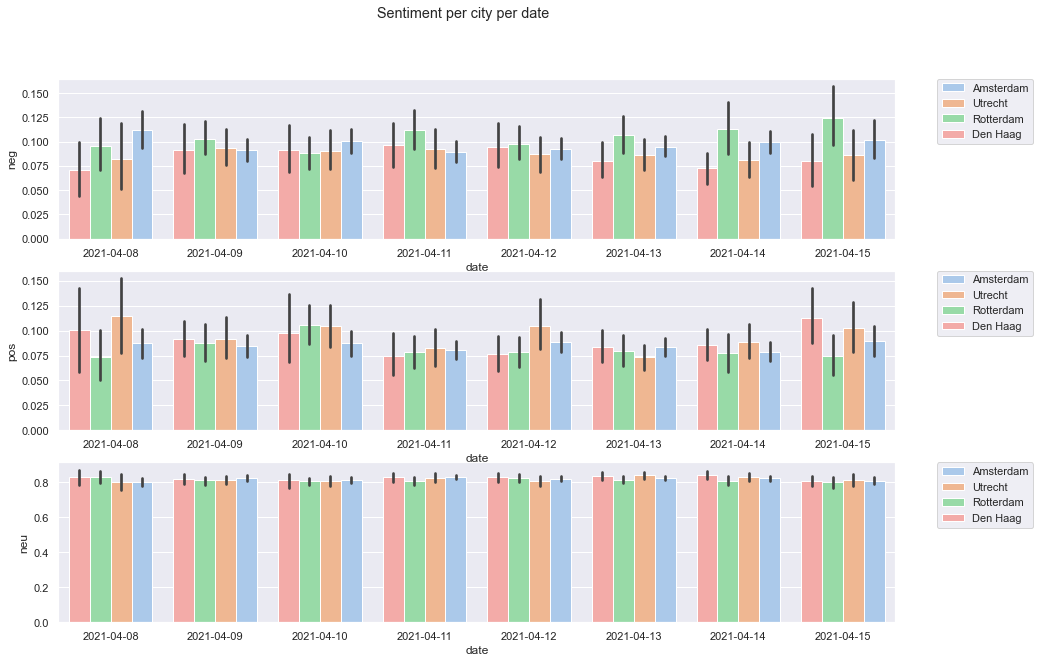

In [9]:
#Box plots how three varying sentiments are dividided over time in four major Dutch cities

#Set plot layout
sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Sentiment per city per date')
palette = sns.color_palette("pastel")

barplot_neg = sns.barplot(ax=axes[0], x="date", y="neg", hue="city", data=tweets, palette=palette)
barplot_neg.invert_xaxis()
barplot_neg.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

barplot_pos = sns.barplot(ax=axes[1], x="date", y="pos", hue="city", data=tweets, palette=palette)
barplot_pos.invert_xaxis()
barplot_pos.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

barplot_neu = sns.barplot(ax=axes[2], x="date", y="neu", hue="city", data=tweets, palette=palette)
barplot_neu.invert_xaxis()
barplot_neu.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

When the relation between sentiments per city throughout the week is analysed in a line plot, the graps below is the result. It contains more or less the same information. However, it is visualized alternatively. We decided to visualize the confidence interval, based on bootstrapping from our data set, as this shows that none of are outcomes can be defined as significant. Interpreting the graph becomes harder, however it is important to stipulate that the limited data set we created is interesting, but not sufficient enough for significant conclusions. 

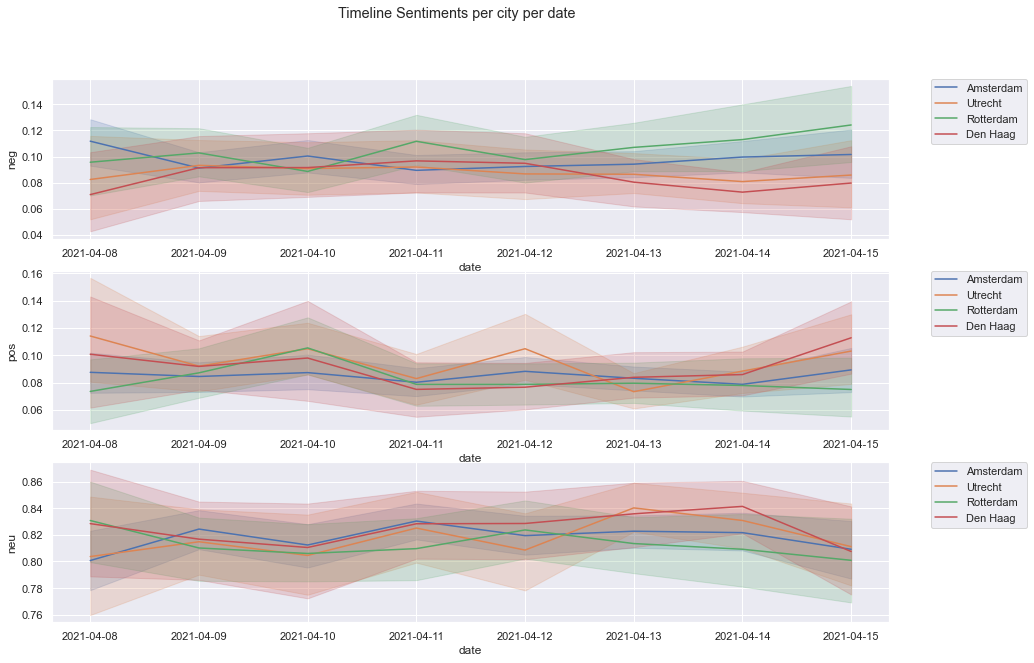

In [121]:
# Time line of three varying sentiments in major Dutch cities

#Set plot layout
sns.set(rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Timeline Sentiments per city per date')

lineplot_neg = (sns.lineplotax=axes[0], x="date", y="neg", hue="city", data=tweets, palette= "deep")
lineplot_neg.invert_xaxis()
lineplot_neg.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

lineplot_pos = sns.lineplot(ax=axes[1], x="date", y="pos", hue="city", data=tweets, palette="deep")
lineplot_pos.invert_xaxis()
lineplot_pos.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

lineplot_neu = sns.lineplot(ax=axes[2], x="date", y="neu", hue="city", data=tweets, palette="deep")
lineplot_neu.invert_xaxis()
lineplot_neu.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [131]:
#TO DO !!
# Create a new data frame for every city that contains the counts of the sentiments per date.

ams_valuecount = tweets_amsterdam.groupby('date'), pd.DataFrame.(tweets_amsterdam['sentiment'].value_counts()))
print(ams_valuecount)
#sns.lineplot(x="date", y='sentiment'.value_counts(), hue='sentiment', data=ams_valuecount, palette= "deep")

SyntaxError: invalid syntax (<ipython-input-131-eed735797d95>, line 3)

In [145]:
#TO DO !!
# Create a word cloud for the most used words of the data set



#!pip install wordcloud
from wordcloud import WordCloud
# Read the whole text.

text = tweets['text_eng'].value_counts()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
#plt.figure()
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

TypeError: expected string or bytes-like object